# Detect tunnels in the environment

In [1]:
import sys
sys.path.append('../')
from panav.env import NavigationEnv, Box2DRegion, PolygonRegion, box_2d_center, line_seg_to_obstacle
from panav.viz import draw_env
from panav.tunnels import detect_tunnels

import shapely
import numpy as np
from matplotlib import pyplot as plt

from shapely.plotting import plot_polygon, plot_points, plot_line
from shapely import Polygon,LineString,Point


%load_ext autoreload
%autoreload 2

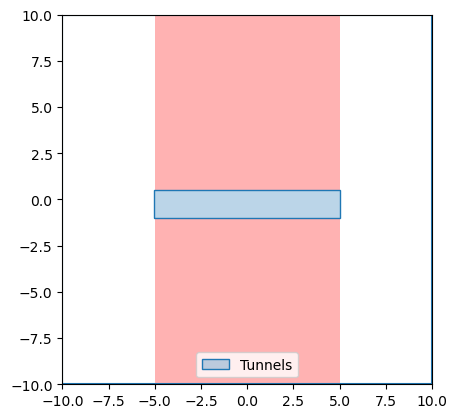

In [3]:
start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

O1 = Box2DRegion((-5.0,5.0),(0.5,10))
O2 = Box2DRegion((-5.0,5.0),(-10,-1.0))


limits = [(-10.0,10.0),(-10.0,10.0)]

bloating_r = 0.5 

env = NavigationEnv(limits,[O1,O2],[],[])

ax = plt.gca()

draw_env(env,ax=ax)
        

labeled = False
tunnels = detect_tunnels(env,bloating_r)
for tunnel in tunnels:
    plot_polygon(tunnel,ax=ax,label='Tunnels' if not labeled else None,add_points =False)
    labeled=True
    
ax.legend()
plt.show()

# Items

Tunnel class. Single tunnel.
1. region: shapely polygon
2. freefaces: shapely linestrings, faces of the polygon that does not intersect with any obstacles or other tunnels(require a list of tunnel objects)
3. passage: {(free face id1, free face id2): waitlist, passinglist}
4. Method: inout(waypoint1, waypoint2, freeface): output 0 if wp1-wp2 does not intersect with free face. +1 if wp1-wp2 comes out the tunnel. -1 if goes into the tunnel. Determine +-1 using the perp vector of freeface.
5. Method: get_passage(PWL of the agent). Return the corresponding waitlist and passing list.

PWL of the agent:

some segments of the PWL are marked as hard, other soft. Hard segments go through a tunnel/a connected tunnel network. Hard segments starts with a wait wp, the agent should wait at this wp before enter the tunnel/tunnel network.

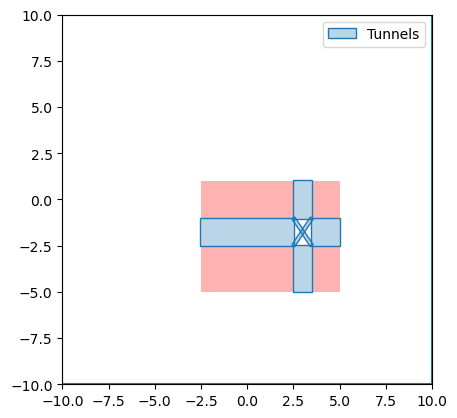

In [4]:
start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

o1 = Box2DRegion((-2.5,2.5),(-1.0,1.0))
o2 = Box2DRegion((-2.5,2.5),(-5,-2.5))

o3 = Box2DRegion((3.5,5),(-5,-2.5))

o4 = Box2DRegion((3.5,5),(-1.0,1.0))

obstacles = [o1,o2,o3,o4]

limits = [(-10.0,10.0),(-10.0,10.0)]

bloating_r = 0.5 

env = NavigationEnv(limits,obstacles,[],[])

ax = plt.gca()

draw_env(env,ax=ax)
        

labeled = False
tunnels = detect_tunnels(env,bloating_r)
for tunnel in tunnels:
    plot_polygon(tunnel,ax=ax,label='Tunnels' if not labeled else None,add_points =False)
    labeled=True
    
ax.legend()
plt.show()